# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Splitting the Dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training Set

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

##Applying KFOLD

In [5]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 1.00 %
Standard Deviation: 0.60 %


##Predicting the test set Results

In [6]:
y_pred = regressor.predict(poly_reg.transform(X_test))
y_pred_train = regressor.predict(poly_reg.transform(X_train))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.55e+01  1.49e+00]
 [ 1.04e+02  2.20e+01]
 [ 1.02e+02  1.17e+01]
 [ 1.17e+02  6.23e+01]
 [ 6.39e+01  1.26e+00]
 [ 1.13e+02  1.92e+01]
 [ 1.04e+02  8.22e+01]
 [ 9.57e+01  2.24e+02]
 [-3.70e+00  1.00e+00]
 [ 9.28e+01  5.26e+01]
 [ 1.08e+02  2.96e+02]
 [ 1.00e+02  6.92e+01]
 [-3.38e+01  1.45e+00]
 [ 1.06e+02  1.07e+02]
 [ 8.90e+01  7.48e+01]
 [ 1.00e+02  5.42e+00]
 [ 1.16e+02  1.36e+01]
 [-1.75e+01  1.03e+00]
 [ 9.46e+01  3.84e+00]
 [ 1.13e+02  2.69e+02]
 [ 3.14e+01  8.61e-01]
 [ 1.03e+02  6.20e+00]
 [ 1.17e+02  1.16e+02]
 [ 1.11e+02  5.61e+00]
 [ 1.03e+02  1.26e+01]
 [ 1.00e+02  1.44e+02]
 [ 1.00e+02  4.95e+00]
 [ 1.10e+02  1.84e+00]
 [ 6.69e+01  1.29e+00]
 [ 9.48e+01  2.06e+00]
 [ 6.52e+01  8.64e-01]
 [ 3.45e+01  1.17e+00]
 [ 9.63e+01  7.14e+00]
 [ 8.34e+01  2.57e+00]
 [ 1.09e+02  1.12e+01]
 [ 1.07e+02  3.72e+01]
 [ 9.80e+01  2.56e+00]
 [ 9.76e+01  7.10e+01]
 [ 9.16e+01  3.12e+00]
 [ 1.01e+02  2.55e+01]
 [ 1.07e+02  5.73e+00]
 [ 1.08e+02  3.76e+01]
 [ 2.17e+01  1.18e+00]
 [ 1.09e+02

##Evaluating the Model Performance

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))

R2 Score:  0.026957553642304233
Mean Squared Error:  26905.771998902153
R2 Score: 0.03105021281451692
Mean Squared Error: 59412.142695253126


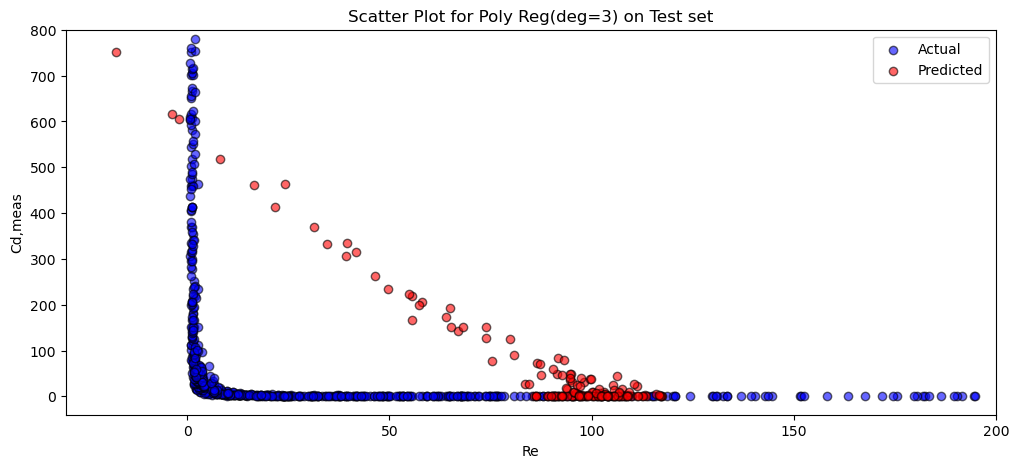

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' ,edgecolors='black', alpha=0.6, label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 800)
plt.xlim(-30, 200)
plt.title('Scatter Plot for Poly Reg(deg=3) on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [9]:
print("R2 Score: ", r2_score(y_pred ,X_test[:,-1]))

R2 Score:  -328.33131102244744


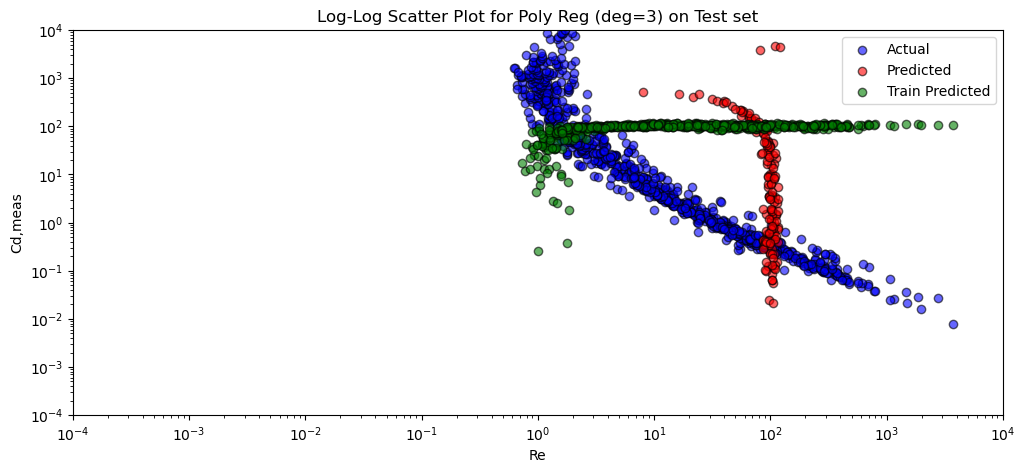

In [10]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:,-1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:,-1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter(y_train, y_pred_train, color='green',edgecolors='black', alpha=0.6, label='Train Predicted')


plt.ylim(0.0001,10000)
plt.xlim(0.0001,10000)

plt.xscale('log')
plt.yscale('log')

plt.title('Log-Log Scatter Plot for Poly Reg (deg=3) on Test set')
plt.xlabel('Re')
plt.ylabel('Cd,meas')
plt.legend()

plt.show()

In [11]:
print("R2 Score: ", r2_score(y_pred_train ,X_train[:,-1]))

R2 Score:  -744.5051734278397


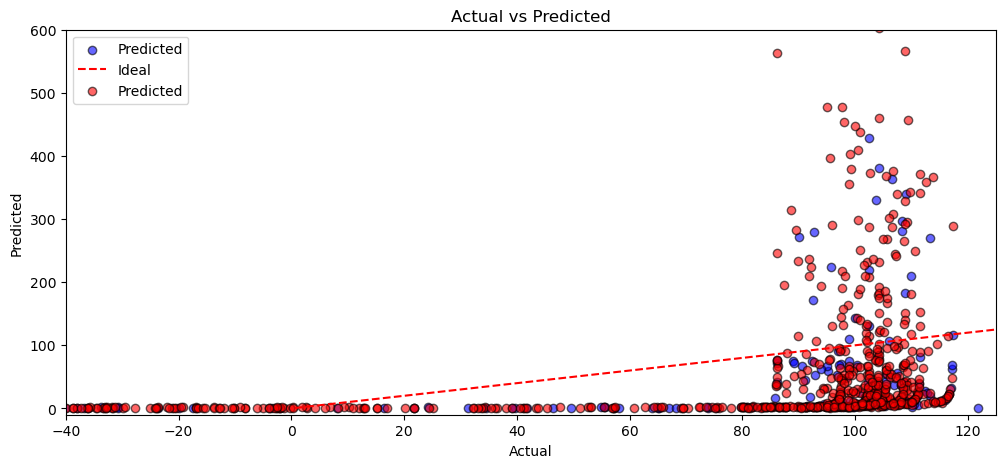

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-40, 125)
plt.ylim(-10, 600)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

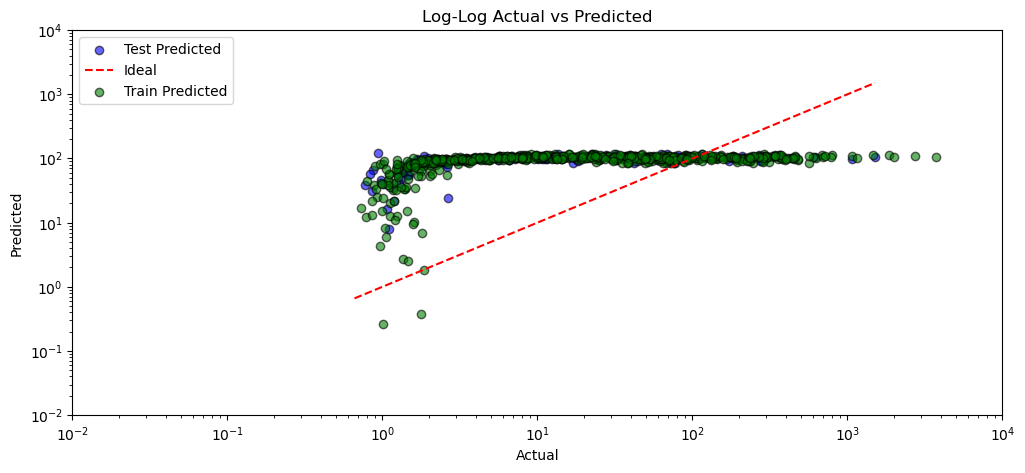

In [13]:
plt.figure(figsize=(12, 5))


plt.scatter(y_test, y_pred, color='blue',edgecolors='black', alpha=0.6, label='Test Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_train, y_pred_train, color='green',edgecolors='black', alpha=0.6, label='Train Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(0.01, 10000)
plt.ylim(0.01, 10000)

plt.xscale('log')
plt.yscale('log')

plt.title('Log-Log Actual vs Predicted')
plt.legend()
plt.show()

## Visualising the Polynomial Regression results

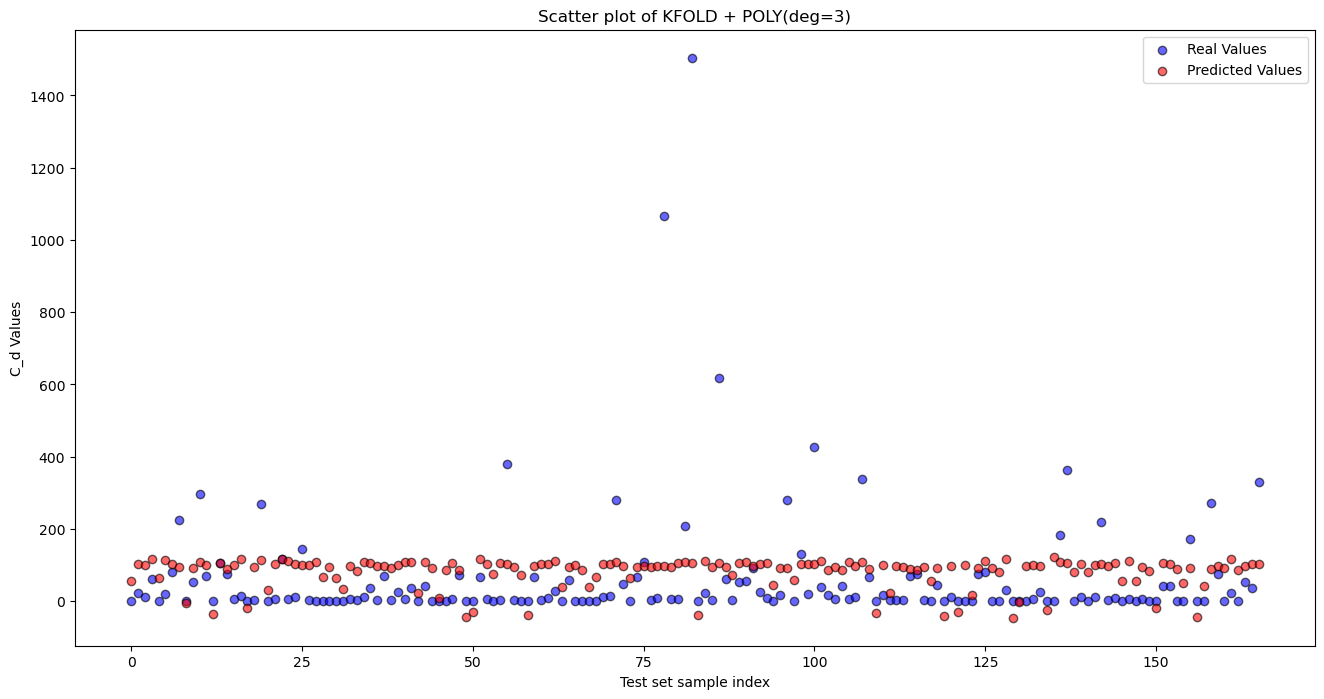

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter plot of KFOLD + POLY(deg=3)')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

##Scatter plot for Train set

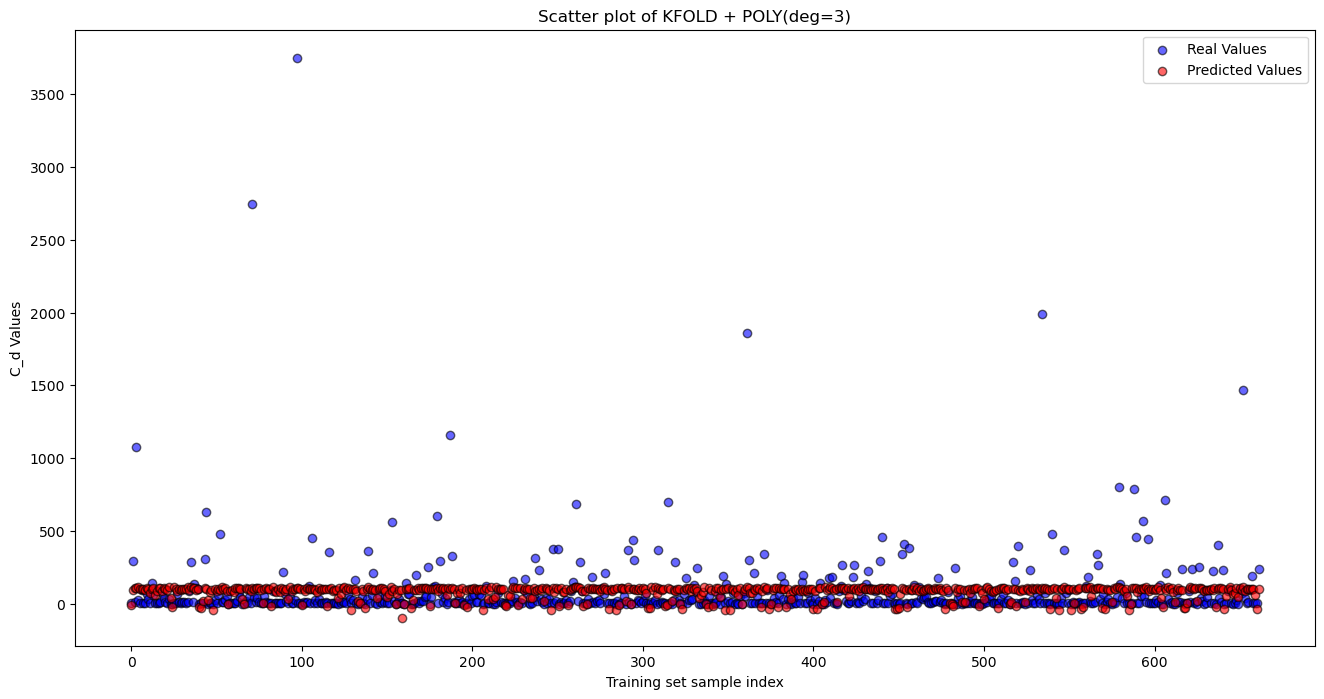

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter plot of KFOLD + POLY(deg=3)')
plt.xlabel('Training set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()